<a href="https://colab.research.google.com/github/kimjeongsoo20190147/bigdata_bitcoin_predict/blob/main/Bitcoin_per_day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import pandas as pd
import numpy as np

In [3]:
# 비트코인 가격 불러오기
data = yf.download("BTC-USD",)
data


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100
...,...,...,...,...,...,...
2024-12-18,100041.539062,100041.539062,106470.609375,100041.539062,106147.296875,93865656139
2024-12-19,97490.953125,97490.953125,102748.148438,95587.679688,100070.687500,97221662392


Ticker,BTC-USD
Date,
2024-10-22,67361.406250
2024-10-23,66432.195312
2024-10-24,68161.054688
2024-10-25,66642.414062
2024-10-26,67014.695312
...,...
2024-12-18,100041.539062
2024-12-19,97490.953125
2024-12-20,97755.929688


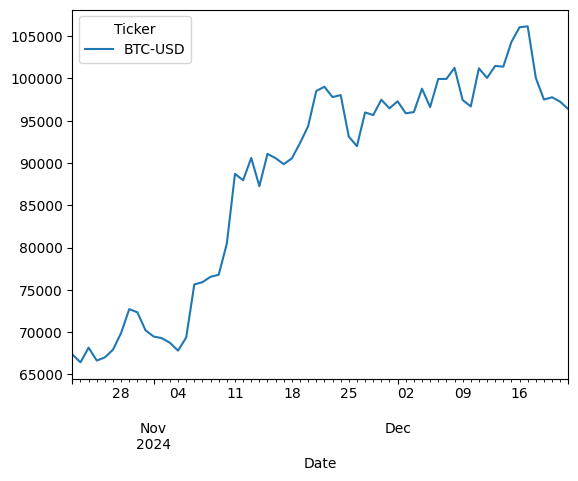

In [4]:
# 종가만 추출
close = data['Close']

# 비교 기준 구간
start_date = "2024-10-22"
end_date = "2024-12-22"

# 기준 구간 시계열 차트
close[start_date:end_date].plot()

base = close[start_date:end_date]
base

In [5]:
# 정규화를 통해 0과 1 사이의 값을 갖도록
base_norm = (base - base.min()) / (base.max() - base.min())
base_norm

Ticker,BTC-USD
Date,
2024-10-22,0.023401
2024-10-23,0.000000
2024-10-24,0.043539
2024-10-25,0.005294
2024-10-26,0.014669
...,...
2024-12-18,0.846404
2024-12-19,0.782171
2024-12-20,0.788844


In [6]:
# 윈도우 사이즈
window_size = len(base)

# 예측 기간
next_date = 60

# 검색 횟수(패턴)
moving_cnt = len(close) - window_size - next_date - 1

In [7]:
# 1에 가까울수록 유사도 높음, 0에 가까울수록 유사도 떨어짐
def cosine_similarity(x,y):
    return np.dot(x,y) / (np.sqrt(np.dot(x,x)) * np.sqrt(np.dot(y,y)))

In [8]:
# 코사인 유사도 함수 정의
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

# 유사도 저장 리스트
sim_list = []

for i in range(moving_cnt):
    target = close[i:i+window_size]
    # Normalize(정규화)
    target_norm = (target - target.min()) / (target.max() - target.min())
    # 코사인 유사도 계산
    cos_similarity = cosine_similarity(base_norm.to_numpy().flatten(), target_norm.to_numpy().flatten())
    sim_list.append(cos_similarity)

# 유사도 상위 30개 출력 (확인용)
top30 = pd.Series(sim_list).sort_values(ascending=False).head(30)
print("유사도 상위 30개 인덱스:\n", top30)

유사도 상위 30개 인덱스:
 3303    0.990119
2557    0.990065
2556    0.989866
3023    0.988736
3301    0.988725
3022    0.988645
3302    0.988528
3021    0.987696
2558    0.987674
2487    0.986733
2486    0.986593
3304    0.986591
2555    0.986465
2489    0.986404
2559    0.986390
2029    0.986375
2488    0.986291
3020    0.985853
3300    0.985602
2030    0.985566
2317    0.985504
3024    0.985414
752     0.985192
3432    0.985117
751     0.985012
753     0.984856
2490    0.984675
3433    0.984464
2318    0.984333
2031    0.984114
dtype: float64


비슷한 패턴의 시작 시기: 2023-10-03 00:00:00
비슷한 패턴의 종료 시기: 2023-12-03 00:00:00
평균 유사도: 0.7761141746724564
유사도 표준편차: 0.1656121977372142
유사도 분포:
 count    3627.000000
mean        0.776114
std         0.165612
min         0.342028
25%         0.642390
50%         0.817357
75%         0.919614
max         0.990119
dtype: float64
유사도가 0.95 이상인 패턴의 개수: 539
전체 대비 비율: 14.86%


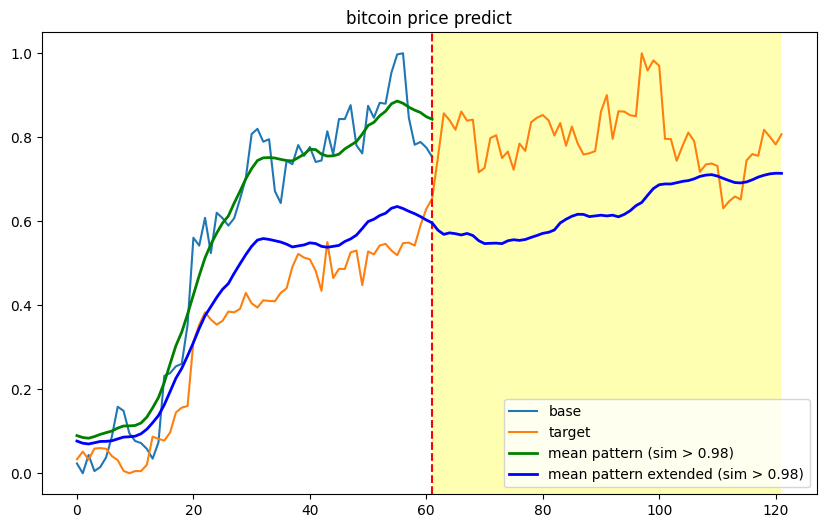

In [10]:
# 가장 유사도가 높은 구간 idx 선택
idx = 3303

top_ = close[idx:idx+window_size+next_date]
top_norm = (top_ - top_.min()) / (top_.max() - top_.min())

# 여기서 패턴 시작 시기와 종료 시기 추출
pattern_start_date = close.index[idx]
pattern_end_date = close.index[idx+window_size-1]
print("비슷한 패턴의 시작 시기:", pattern_start_date)
print("비슷한 패턴의 종료 시기:", pattern_end_date)

# 유사도 통계 정보 확인
sim_series = pd.Series(sim_list)
print("평균 유사도:", sim_series.mean())
print("유사도 표준편차:", sim_series.std())
print("유사도 분포:\n", sim_series.describe())

# 특정 임계값 이상의 패턴 비율 계산 (예: 0.9 이상)
threshold = 0.95
count_over_threshold = (sim_series > threshold).sum()
ratio = count_over_threshold / len(sim_series)
print(f"유사도가 {threshold} 이상인 패턴의 개수: {count_over_threshold}")
print(f"전체 대비 비율: {ratio * 100:.2f}%")

high_threshold = 0.98
high_sim_indices = np.where(sim_series > high_threshold)[0]

#### 유사도 0.98 이상 패턴들의 평균 패턴 계산 (윈도우 구간) ####
patterns = []
for i in high_sim_indices:
    pattern = close[i:i+window_size]
    if len(pattern) == window_size:
        pattern_norm = (pattern - pattern.min()) / (pattern.max() - pattern.min())
        patterns.append(pattern_norm.values)

if len(patterns) > 0:
    mean_pattern = np.mean(patterns, axis=0)
else:
    mean_pattern = None
#### 여기까지 ####

#### 유사도 0.98 이상 패턴들의 평균 패턴 계산 (30일 이후 포함) ####
patterns_extended = []
for i in high_sim_indices:
    # 패턴 + 30일 미래 포함
    extended = close[i:i+window_size+next_date]
    # 혹시 데이터 끝에 가까워서 30일 연장 불가한 경우를 대비
    if len(extended) == window_size+next_date:
        ext_norm = (extended - extended.min()) / (extended.max() - extended.min())
        patterns_extended.append(ext_norm.values)

if len(patterns_extended) > 0:
    mean_pattern_extended = np.mean(patterns_extended, axis=0)
else:
    mean_pattern_extended = None
#### 여기까지 ####

plt.figure(figsize=(10,6))
plt.plot(base_norm.values, label='base')
plt.plot(top_norm.values, label='target')
plt.axvline(x=len(base_norm)-1, c='r', linestyle='--')
plt.axvspan(len(base_norm.values)-1, len(top_norm.values)-1, facecolor='yellow', alpha=0.3)

# 평균 패턴 (윈도우 구간까지만)
if mean_pattern is not None:
    plt.plot(mean_pattern, label='mean pattern (sim > 0.98)', color='green', linewidth=2)

#### 평균 패턴 (30일 이후 포함) 그래프 추가 ####
if mean_pattern_extended is not None:
    plt.plot(mean_pattern_extended, label='mean pattern extended (sim > 0.98)', color='blue', linewidth=2)
#### 여기까지 ####

plt.legend()
plt.title("bitcoin price predict")
plt.show()